# 线性回归
## 散点图
一家大型商业银行在多个地区设有分行, 其业务主要是进行基础设施建设、国家重点项目建设、固定资产投资等项目的贷款。近年来，该银行的贷款额平稳增长，但不良贷款额也有较大比例的增长，这给银行业务的发展带来较大压力。为弄清楚不良贷款形成的原因，管理者希望利用银行业务的有关数据做些定量分析，以便找出控制不良贷款的办法。该银行所属的25家分行2002年的有关业务数据如下。管理者想知道,不良贷款是否与贷款余额、累计应收贷款、项目贷款的多 少、固定资产投资额等因素有关?如果有关系，他们之间是一种什么样的关系？关系强度如何？试绘制散点图，分析他们之间的关系。 


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("data/例11.6.xlsx",header=0)
data.head()

,分行编号,不良贷款 (亿元）,各项贷款余额 (亿元),本年累计应收贷款 (亿元),贷款项目个数 (个),本年固定资产投资额 (亿元)
0,1,0.9,67.3,6.8,5,51.9
1,2,1.1,111.3,19.8,16,90.9
2,3,4.8,173.0,7.7,17,73.7
3,4,3.2,80.8,7.2,10,14.5
4,5,7.8,199.7,16.5,19,63.2


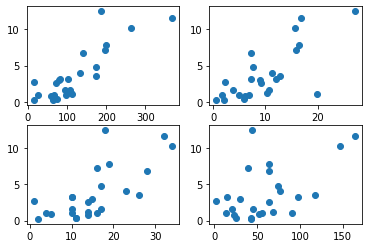

In [8]:
index1 = data.iloc[:,2] 
index2 = data.iloc[:,3] 
index3 = data.iloc[:,4] 
index4 = data.iloc[:,5] 
y = data.iloc[:,1]
fig=plt.figure()
ax1=fig.add_subplot(221)
ax1.scatter(index1,y)
ax2=fig.add_subplot(222)
ax2.scatter(index2,y)
ax3=fig.add_subplot(223)
ax3.scatter(index3,y)
ax4=fig.add_subplot(224)
ax4.scatter(index4,y)

## 相关系数
### 协方差
![协方差](img/equation.svg)

In [9]:
cov1 = np.cov(index1,y)
cov1

array([[6455.5656    ,  244.63176667],
       [ 244.63176667,   13.0271    ]])

In [11]:
y

0      0.9
1      1.1
2      4.8
3      3.2
4      7.8
5      2.7
6      1.6
7     12.5
8      1.0
9      2.6
10     0.3
11     4.0
12     0.8
13     3.5
14    10.2
15     3.0
16     0.2
17     0.4
18     1.0
19     6.8
20    11.6
21     1.6
22     1.2
23     7.2
24     3.2
Name: 不良贷款\n(亿元）, dtype: float64